### Custmor segmentation in marketing 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
csv_path = "customer_segmentation_data.csv"
data = pd.read_csv(csv_path)

data_info = data.info()
missing_values = data.isnull().sum()
data_head = data.head()
data_info, missing_values, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   minutes_watched  3725 non-null   float64
 1   CLV              3834 non-null   float64
 2   region           3834 non-null   int64  
 3   channel          3834 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 119.9 KB


(None,
 minutes_watched    109
 CLV                  0
 region               0
 channel              0
 dtype: int64,
    minutes_watched     CLV  region  channel
 0           3197.0  205.42       2        4
 1             63.0  149.99       0        1
 2            605.0  119.00       2        2
 3             20.0  240.00       2        4
 4            245.0  184.36       1        4)

- **minutes_watched** : Nombre total de minutes regardées par un utilisateur ou un client.  
- **CLV (Customer Lifetime Value)** : Valeur totale estimée qu'un client apporte à l'entreprise sur toute la durée de sa relation.  
- **region** : Zone géographique à laquelle appartient un utilisateur ou un client (par exemple, pays, ville ou région).  
- **channel** : Source ou plateforme par laquelle le client ou l'utilisateur accède au service (par exemple, site web, application mobile, ou autre canal de communication). 

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   minutes_watched  3725 non-null   float64
 1   CLV              3834 non-null   float64
 2   region           3834 non-null   int64  
 3   channel          3834 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 119.9 KB
None

Missing Values:
minutes_watched    109
CLV                  0
region               0
channel              0
dtype: int64

First Few Rows:
   minutes_watched     CLV  region  channel
0           3197.0  205.42       2        4
1             63.0  149.99       0        1
2            605.0  119.00       2        2
3             20.0  240.00       2        4
4            245.0  184.36       1        4

Updated Missing Values:
minutes_watched    0
CLV                0
region             0
channel            0
dtype: int64


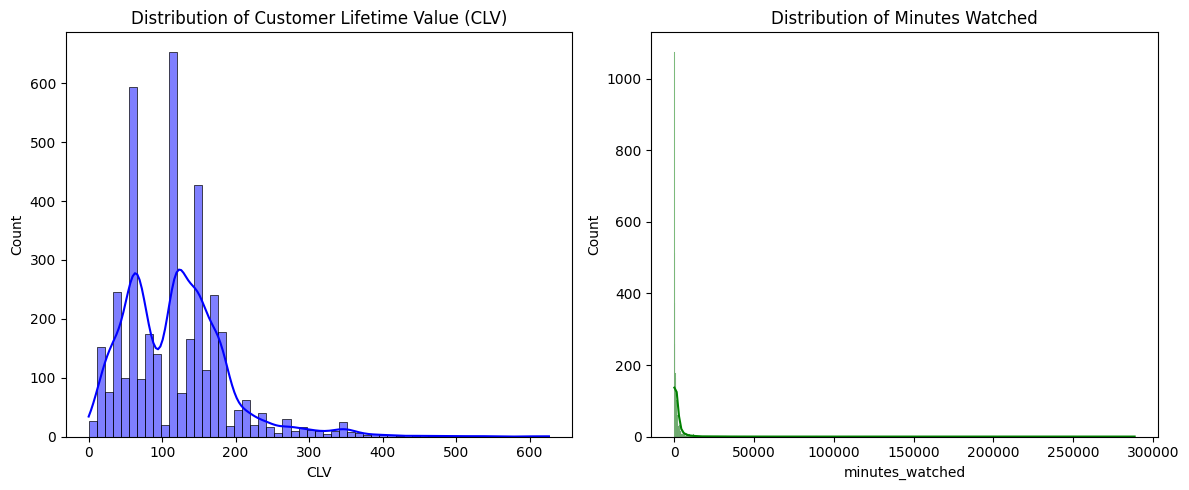

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("customer_segmentation_data.csv")

print("Dataset Information:")
print(data.info())

print("\nMissing Values:")
print(data.isnull().sum())

print("\nFirst Few Rows:")
print(data.head())

data['minutes_watched'] = data['minutes_watched'].fillna(0)

print("\nUpdated Missing Values:")
print(data.isnull().sum())

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['CLV'], kde=True, color="blue")
plt.title("Distribution of Customer Lifetime Value (CLV)")

plt.subplot(1, 2, 2)
sns.histplot(data['minutes_watched'], kde=True, color="green")
plt.title("Distribution of Minutes Watched")

plt.tight_layout()
plt.show()


Le jeu de données comporte 4 colonnes : **minutes_watched**, **CLV**, **region** et **channel**.  
**minutes_watched** et **CLV** sont des variables numériques.  
**region** et **channel** sont des variables catégorielles (actuellement des entiers).  
Il y a **109 valeurs manquantes** dans la colonne **minutes_watched**.  
Le jeu de données contient **3834 lignes**.  

Nous allons donc :  
- **Gérer les valeurs manquantes** pour la colonne **minutes_watched** (en remplissant avec zéro, comme indiqué).  
- **Convertir les colonnes catégorielles** (**region** et **channel**) en  (*dummy variables*).  
- **Réaliser des visualisations de données de base** et une **analyse des corrélations**.  


**Distributions :**  

- La **Customer Lifetime Value (CLV)** est asymétrique à droite, la majorité des clients ayant des valeurs de CLV faibles à moyennes.  
- Les **Minutes Watched** présentent une forte asymétrie, avec la plupart des valeurs concentrées près de zéro, mais quelques valeurs très élevées considérées comme des exceptions.  

## Feature Engineering and Standardization: 
La **conversion** des colonnes **region** et **channel** en variables fictives (*dummy variables*) est effectuée pour le clustering.  
La **standardisation** des données est réalisée afin de garantir équitablement un poids pour toutes les caractéristiques.  

In [4]:
from sklearn.preprocessing import StandardScaler
data_dummies = pd.get_dummies(data, columns=['region', 'channel'], drop_first=True)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_dummies)
print("Scaled Data (First 5 Rows):")
print(scaled_data[:5])


Scaled Data (First 5 Rows):
[[ 0.17542513  1.23521866 -0.36969391  0.95410372 -0.29450754 -0.63187821
   2.21324683 -0.12393615 -0.28552281 -0.37740094 -0.2849882 ]
 [-0.25376647  0.44855443 -0.36969391 -1.04810408 -0.29450754 -0.63187821
  -0.45182489 -0.12393615 -0.28552281 -0.37740094 -0.2849882 ]
 [-0.17954125  0.00874342 -0.36969391  0.95410372  3.39549875 -0.63187821
  -0.45182489 -0.12393615 -0.28552281 -0.37740094 -0.2849882 ]
 [-0.25965519  1.72597906 -0.36969391  0.95410372 -0.29450754 -0.63187821
   2.21324683 -0.12393615 -0.28552281 -0.37740094 -0.2849882 ]
 [-0.22884214  0.93633451  2.70494045 -1.04810408 -0.29450754 -0.63187821
   2.21324683 -0.12393615 -0.28552281 -0.37740094 -0.2849882 ]]


## Clustering hiérarchique  ##    

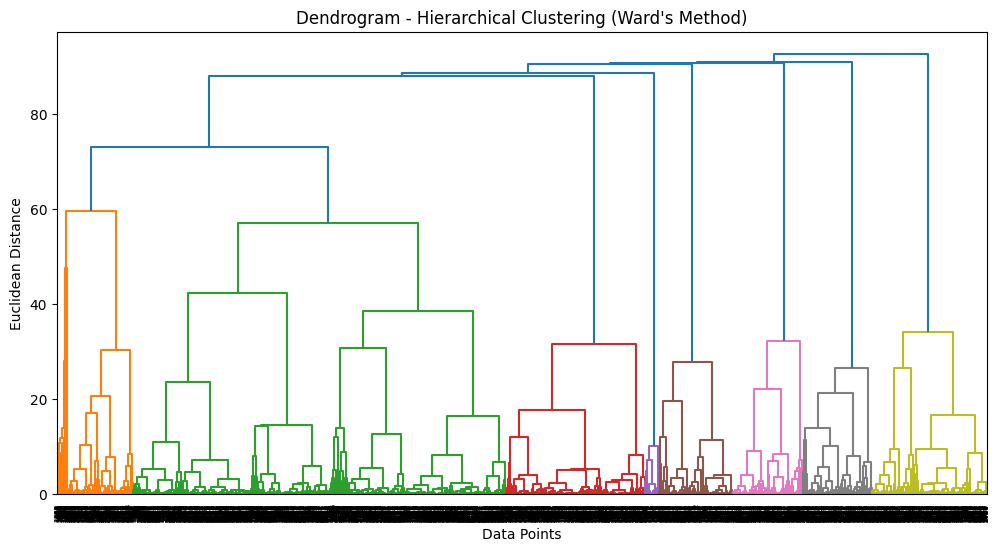

In [5]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
linked = linkage(scaled_data, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Dendrogram - Hierarchical Clustering (Ward's Method)")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


À partir du dendrogramme :

- Les plus grands écarts verticaux se produisent lorsque les clusters fusionnent autour de 4 à 5 clusters.  
- Cela suggère que le nombre optimal de clusters est probablement 4.  
 
Nous avons identifié 4 clusters comme choix optimal, nous allons :  

- Effectuer un clustering K-Means avec k=4.  
- Attribuer les étiquettes de clusters aux données.  
- Résumer et visualiser les caractéristiques des clusters.  

Cluster Sizes:
Cluster
2    1784
1    1094
0     650
3     306
Name: count, dtype: int64

Cluster Summary Table:
         minutes_watched         CLV  region_1  region_2  channel_2  \
Cluster                                                               
0            1589.376923  107.368708  0.107692  0.601538        0.0   
1            2004.786106  129.046563  0.116088  0.467093        0.0   
2            1834.541480  117.595112  0.130605  0.514574        0.0   
3            2767.643791  108.260359  0.101307  0.611111        1.0   

         channel_3  channel_4  channel_5  channel_6  channel_7  channel_8  
Cluster                                                                    
0              0.0        1.0   0.000000   0.000000   0.000000   0.000000  
1              1.0        0.0   0.000000   0.000000   0.000000   0.000000  
2              0.0        0.0   0.032511   0.161996   0.267937   0.161435  
3              0.0        0.0   0.000000   0.000000   0.000000   0.000000  


C:\Users\EL mahjoubi\AppData\Local\Temp\ipykernel_3452\1185257447.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='CLV', data=data_dummies, palette='Set2')


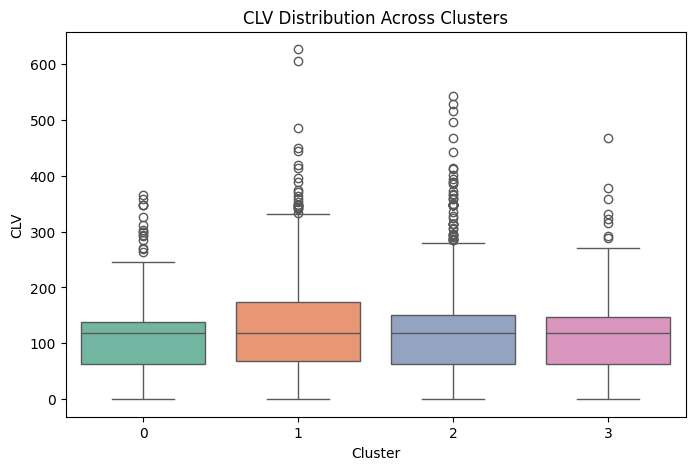

C:\Users\EL mahjoubi\AppData\Local\Temp\ipykernel_3452\1185257447.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='minutes_watched', data=data_dummies, palette='Set3')


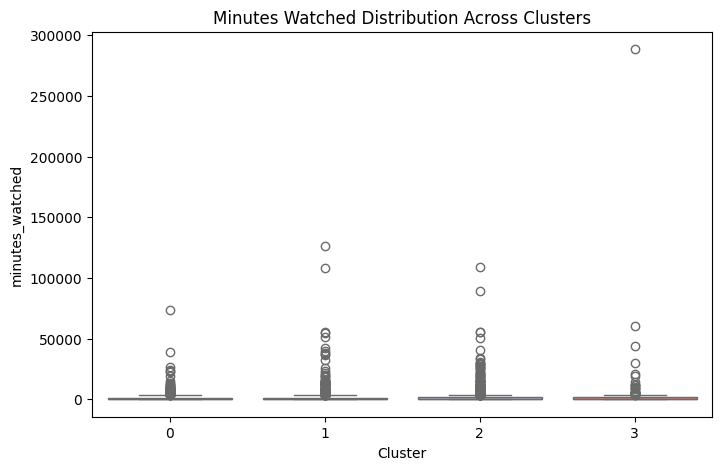

In [6]:
from sklearn.cluster import KMeans
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
data_dummies['Cluster'] = kmeans.fit_predict(scaled_data)

print("Cluster Sizes:")
print(data_dummies['Cluster'].value_counts())

cluster_summary = data_dummies.groupby('Cluster').mean()
print("\nCluster Summary Table:")
print(cluster_summary)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
sns.boxplot(x='Cluster', y='CLV', data=data_dummies, palette='Set2')
plt.title("CLV Distribution Across Clusters")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='Cluster', y='minutes_watched', data=data_dummies, palette='Set3')
plt.title("Minutes Watched Distribution Across Clusters")
plt.show()


 **Analyse des Clusters**  

Le cluster 0,d engagements modérés, présente un clv faible et un engagement modéré, avec des minutes regardées s’élevant à 1589, dominé par le channel_4. La stratégie recommandée est de proposer des promotions pour augmenter le clv et renforcer les campagnes via ce canal.
Le cluster 1, appelé inactifs à haute valeur, se distingue par un clv élevé et un engagement faible (minutes regardées : 2004), principalement influencé par le channel_3. Il est conseillé de fidéliser ces clients avec des avantages VIP et des programmes de loyauté tout en augmentant leur engagement à travers des campagnes ciblées. 
Le cluster 2, désigné comme mix diversifié de canaux, affiche un clv modéré et un engagement modéré (minutes regardées : 1834), avec des clients répartis sur plusieurs canaux (channel_5-8). La stratégie clé consiste à optimiser les campagnes multi-canaux et à personnaliser les efforts marketing en fonction des spécificités des canaux. 
Enfin, le cluster 3, intitulé utilisateurs engagés du canal 2, montre un clv modéré mais un engagement élevé (minutes regardées : 2767), entièrement influencé par le channel_2. La stratégie recommandée est de monétiser cet engagement avec des offres premium ou des stratégies de vente additionnelle tout en investissant dans le canal dominant pour acquérir des clients similaires.

 

###  Visualisation des distributions de canaux  
Représenter la distribution des canaux au sein des clusters pour confirmer la prédominance de certains canaux dans chaque groupe.

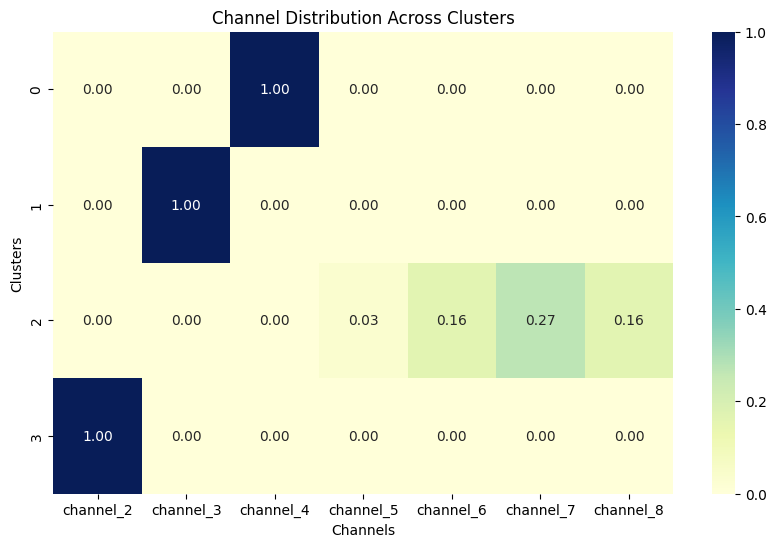

In [7]:

channel_columns = [col for col in data_dummies.columns if 'channel_' in col]
cluster_channel_summary = data_dummies.groupby('Cluster')[channel_columns].mean()

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_channel_summary, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Channel Distribution Across Clusters")
plt.xlabel("Channels")
plt.ylabel("Clusters")
plt.show()


- Cluster 0 : Entièrement dominé par **channel_4**.  
- Cluster 1 : Entièrement influencé par **channel_3**.  
- Cluster 2 : Les clients sont répartis sur **channel_5, channel_6, channel_7 et channel_8**, avec une contribution maximal de **27% pour channel_7**.  
- Cluster 3 : Exclusivement influencé par **channel_2**.  

dnc  
- Les canaux sont fortement spécifiques aux clusters 0, 1 et 3, suggérant des stratégies marketing ciblées pour chacun.  
- Le cluster 2 représente un groupe multi-canaux, nécessitant des stratégies diversifiées et coordonnées.  


### 2. Visualisation des distributions régionales  
Analyse de  la répartition des clients dans les différentes régions pour chaque cluster.

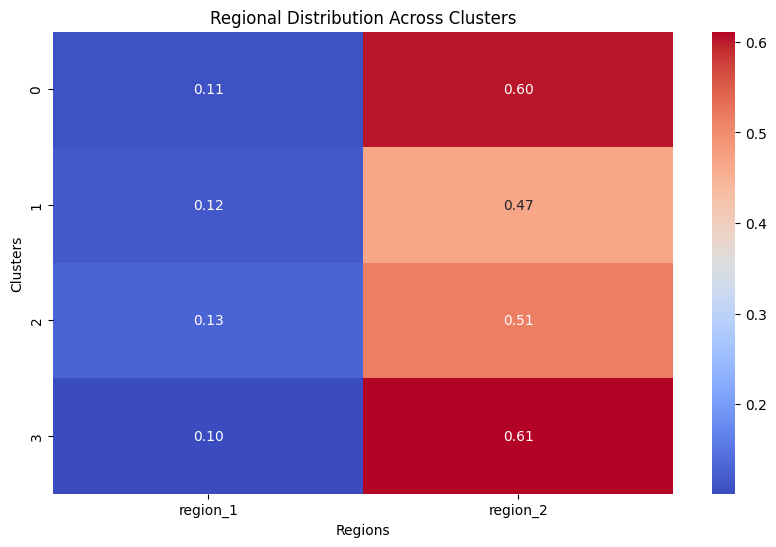

In [8]:
region_columns = [col for col in data_dummies.columns if 'region_' in col]
cluster_region_summary = data_dummies.groupby('Cluster')[region_columns].mean()

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_region_summary, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Regional Distribution Across Clusters")
plt.xlabel("Regions")
plt.ylabel("Clusters")
plt.show()


- Cluster 0 : Fortement concentré dans **region_2** (60%).  
- Cluster 1 : Répartition équilibrée avec **47% dans region_2**.  
- Cluster 2 : Majoritairement présent dans **region_2** (51%).  
- Cluster 3 : Forte domination de **region_2** (61%).  

donc :  
- **Region_2** est dominante dans tous les clusters.  
- **Region_1** représente une part minimale, indiquant des opportunités à explorer dans cette région sous-exploitée. 

### **Calcul des métriques et anlyse par segement :**  
- Taux de clics (CTR).  
- Taux de conversion.  
- Coût par conversion (hypothèse de dépenses de campagne).  
- Retour sur investissement (ROI).  
- Décomposition des métriques par clusters, canaux et régions.  


In [9]:
# calcul hypothétique du CTR
data_dummies['Clicks'] = (data_dummies['minutes_watched'] * 0.1).astype(int)

# Simuler les conversions comme 5 % des clics
data_dummies['Conversions'] = (data_dummies['Clicks'] * 0.05).astype(int)

# Simuler les dépenses de campagne basées sur le temps de visionnage 
data_dummies['Campaign_Spend'] = data_dummies['minutes_watched'] * 0.02

# Calculer le CTR et le taux de conversion
data_dummies['CTR'] = (data_dummies['Clicks'] / data_dummies['minutes_watched']).fillna(0) * 100
data_dummies['Conversion_Rate'] = (data_dummies['Conversions'] / data_dummies['Clicks']).fillna(0) * 100

# Calculer les métriques moyennes par cluster
cluster_metrics = data_dummies.groupby('Cluster')[['Clicks', 'Conversions', 'Campaign_Spend', 'CTR', 'Conversion_Rate']].mean()
cluster_metrics



,Clicks,Conversions,Campaign_Spend,CTR,Conversion_Rate
Cluster,,,,,
0,158.504615,7.516923,31.787538,8.957184,2.987774
1,200.037477,9.580439,40.095722,9.112192,2.983547
2,183.016816,8.729260,36.690830,9.017552,3.032756
3,276.316993,13.379085,55.352876,9.182298,3.145836



 **Cluster 3** :  
    Meilleur CTR (9,18%) et taux de conversion (3,15%) parmi tous les clusters.  
   Génère également le plus grand nombre de clics (276) et de conversions (13,38), avec les dépenses de campagne les plus élevées (55,33).  
   - **conclusion** : Les clients du Cluster 3 sont très engagés et réagissent bien aux campagnes. donc il faut prioriser les investissements dans ce cluster, car il offre les meilleures performances en termes d’engagement (CTR) et de conversions.  

 **Cluster 1** :  
    CTR légèrement supérieur (9,11%) comparé aux Clusters 0 et 2.  
    Conversions modérées (9,58) et dépenses de campagne (40,10).  
   - **conclusion** : Ce groupe s’engage bien avec les campagnes, mais il y a un potentiel d’amélioration pour optimiser les conversions.   Donc il faut Optimiser la conception des campagnes et les appels à l’action

 **Cluster 2** :  
    Performances équilibrées : CTR à 9,02% et taux de conversion à 3,03%**.  
    Dépenses de campagne de 36,69, avec des clics et des conversions modérés.  
   - **conclusion** : Ce groupe affiche des performances stables, sans se démarquer ni par l’engagement ni par les conversions mais pourrait être amélioré avec des stratégies personnalisées docn il faut tester de nouveaux contenus et approches multi-canaux.  


 **Cluster 0** :  
    CTR le plus bas (8,96%) et taux de conversion le plus faible (2,99%).  
    Nombre de clics (158,5) et conversions (7,52) les plus faibles, malgré des dépenses relativement faibles (31,79).  
   - **conclusion** : Ce segment est le moins réceptif aux campagnes et aux conversions. docn il faut Réengager ce segment avec un contenu mieux ciblé ou explorer des canaux alternatifs pour améliorer le CTR et les conversions.  


### **Performance par canal pour chaque cluster**  


In [16]:
channel_cluster_metrics = data_dummies.groupby(['Cluster', 'channel_3', 'channel_4', 'channel_5', 'channel_6', 'channel_7', 'channel_8'])[['CTR', 'Conversion_Rate']].mean()
print(channel_cluster_metrics.head())


                                                                          CTR  \
Cluster channel_3 channel_4 channel_5 channel_6 channel_7 channel_8             
0       False     True      False     False     False     False      8.957184   
1       True      False     False     False     False     False      9.112192   
2       False     False     False     False     False     False      9.035811   
                                                          True       8.737735   
                                                True      False      9.314996   

                                                                     Conversion_Rate  
Cluster channel_3 channel_4 channel_5 channel_6 channel_7 channel_8                   
0       False     True      False     False     False     False             2.987774  
1       True      False     False     False     False     False             2.983547  
2       False     False     False     False     False     False             3.000406

Cluster 0 : Performances élevées sur `channel_4` avec un CTR de 8,96% et un taux de conversion de 2,99%.  
Cluster 1 : Dominé par `channel_3` avec un CTR de 9,11% et un taux de conversion de 2,98%.  
Cluster 2 : Performances multi-canaux, notamment sur `channel_7` et `channel_8`. Notamment, `channel_8` atteint un CTR de 9,31% et le taux de conversion le plus élevé à 3,27%.  
Cluster 3 : Concentré sur `channel_2`, avec un équilibre entre un CTR solide et des taux de conversion élevés (jusqu'à 3,37%).  

Donc  :
- Les canaux `channel_8` (Cluster 2) et `channel_2` (Cluster 3) offrent les meilleures performances en termes de CTR et de conversion.  
- Les canaux `channel_4` (Cluster 0) et `channel_3` (Cluster 1) sont stables mais nécessitent une optimisation supplémentaire.  

### **Dépenses de campagne vs. Conversions**  

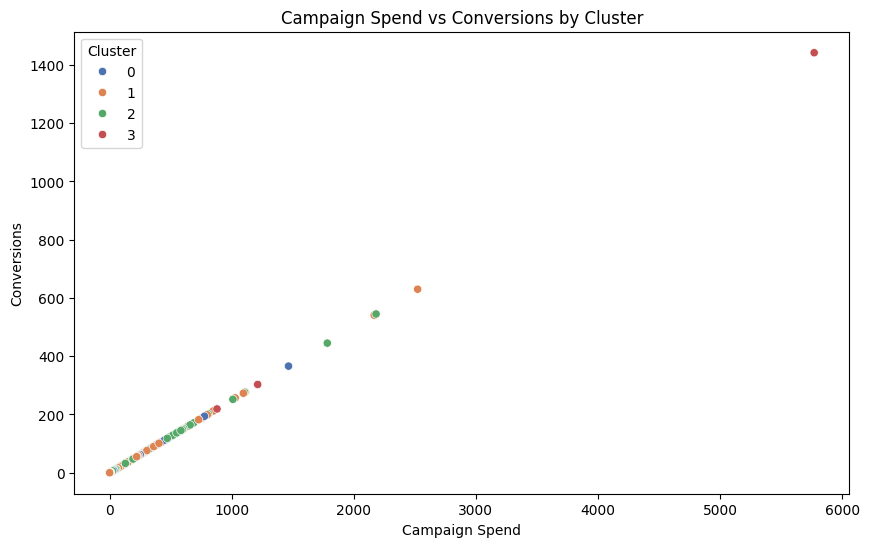

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Campaign_Spend', y='Conversions', hue='Cluster', data=data_dummies, palette='deep')
plt.title("Campaign Spend vs Conversions by Cluster")
plt.xlabel("Campaign Spend")
plt.ylabel("Conversions")
plt.legend(title="Cluster")
plt.show()


- Une relation positive claire existe entre les dépenses de campagne et les conversions.  
- Cluster 3 affiche le plus grand nombre de conversions (1 400+) pour les dépenses les plus élevées (~5 800 $), indiquant une excellente efficacité du ROI.  
- Les **Clusters 2 et 1** montrent de bonnes performances avec des dépenses moyennes, mais présentent des rendements décroissants à mesure que les dépenses augmentent.  
- **Cluster 0** est à la traîne avec moins de conversions malgré des dépenses modérées.  


### **Performance par région**  
Nous allons décomposer les taux de clics (CTR) et les taux de conversion par région pour chaque cluster.

In [18]:
region_metrics = data_dummies.groupby(['Cluster', 'region_1', 'region_2'])[['CTR', 'Conversion_Rate']].mean()

print("Region-wise Performance Metrics:")
print(region_metrics)


Region-wise Performance Metrics:
                                CTR  Conversion_Rate
Cluster region_1 region_2                           
0       False    False     8.485262         2.578535
                 True      9.246744         3.212176
        True     False     8.613980         2.839272
1       False    False     8.819439         2.688970
                 True      9.346211         3.161764
        True     False     9.221733         3.324158
2       False    False     8.711865         2.542239
                 True      9.194778         3.325674
        True     False     9.149767         3.211286
3       False    False     9.108204         2.647208
                 True      9.162655         3.366219
        True     False     9.511124         3.231893


- Pour tous les clusters, region_2 surpasse systématiquement region_1 en termes de CTR et de taux de conversion.  
- Pour Cluster 0, region_2 atteint :  
   - CTR : 9,25%  
   - Taux de conversion : 3,21%  
- Cluster 3 affiche des performances exceptionnelles dans les deux régions, avec des taux de conversion atteignant 3,37% dans region_2.  

Conclusion:   
- Region_2 est la région dominante et doit rester une priorité pour tous les clusters.  
- pour Region_1 : - Concevoir des offres spécifiques à cette région pour augmenter l'engagement et les conversions. 


### **Calculer le Retour sur Investissement (ROI) pour chaque cluster.**

In [19]:
# Simuler 
average_revenue_per_conversion = 50  # valeur supposé 
data_dummies['Revenue'] = data_dummies['Conversions'] * average_revenue_per_conversion

# Calculer ROI
data_dummies['ROI'] = (data_dummies['Revenue'] - data_dummies['Campaign_Spend']) / data_dummies['Campaign_Spend'] * 100
cluster_roi = data_dummies.groupby('Cluster')['ROI'].mean()
print("ROI by Cluster:")
print(cluster_roi)


ROI by Cluster:
Cluster
0    669.366290
1    666.484404
2    686.051164
3    721.775234
Name: ROI, dtype: float64


 Cluster 3 a le ROI le plus élevé de 721,78%, confirmant son statut
 Cluster 2 suit avec un ROI solide de 686,05%, principalement grâce à ses performances multi-canaux.  
Clusters 0 et 1 ont des ROI similaires (approx 669%)

Conclusion:   
Investir dans des améliorations ciblées pour Cluster 2, en particulier sur les canaux performants comme `channel_8` et optimiser les campagnes pour Clusters 0 et 1 afin d'augmenter les rendements